# Topology

I choose to experiment with the topology as explained in the paper provided entitled, "Convolutional Networks for Biomedical Image Segmentation". This involved creating several convolutional layers, max pooling, up-convolutions and finally crop and copy connections. An overall structure of the nueral net can be seen in the image below.



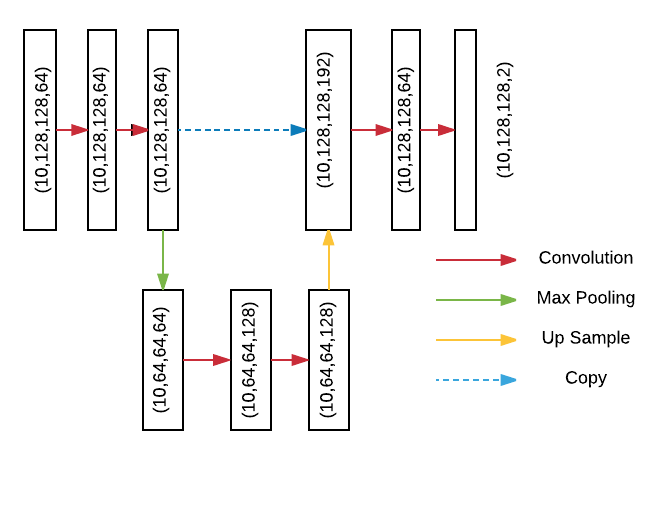

In [4]:
from PIL import Image
from IPython.display import display

img = Image.open('topology_lab6.png')
display(img)

# Cost Function

My network outputs a tensor of size (10,128,128,2) which is places through softmax on the last dimension which normalizes each pixel's probability of being a white or black pixel. I then take the log of the values and multiply that by ground truth which is the same size but with one-hot encoding of the correct classification of white or black mask pixel. The resulting values are reduced and summed along appropraite axis and finally the average is taken of all values.

# Accuracy Method
My accuracy method simply takes the argmax of the ground truth and the softmax output on the last dimensions and compares if they are equal. I then cast this into a float and take a reduced average of the tensors to get a complete accuracy.

# Regulization Results

1) My final classification accuracy is shown below in the table for each Generalized, L2, and Dropout. A better overview of the accuracy as I am training is seen in the graphs of accuracy below as well as the test output on image 'pos_test_000072.png'.

2) The gerneralization seems to hold its own and is actually slightly better than the other two. That being said, I did not train my network for an extraorindinary length of time and so the deviations from training and testing might have more effect as more training had happened.

3) I used a 0.5 probability for dropout.

4) I picked lambda through trial and error and it turned out that a simple parameter of 1 did the trick.

In [26]:
from ipy_table import *

# dictionary
dict = [['','Gerneralization','L2','Dropout'],
        ['Test Accuracy','0.8316','0.8513','0.7436'],
       ['Training Accuracy','0.8101','0.8961','0.8475'],
       ['Difference','0.0215','0.0448','0.1039']]

# create table with make_table
make_table(dict)

# apply some styles to the table after it is created
set_column_style(0, width='100')#, bold=True, color='hsla(225, 80%, 94%, 1)')
set_column_style(1, width='100')
set_column_style(2, width='100')
set_column_style(3, width='100')

# render the table
render()

,Gerneralization,L2,Dropout
Test Accuracy,0.8316,0.8513,0.7436
Training Accuracy,0.8101,0.8961,0.8475
Difference,0.0215,0.0448,0.1039


# Outputs
The outputs from image 'pos_test_000072.png' of each of the different regulizers are shown below with the order being gernalization, l2, dropout.

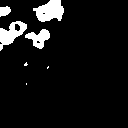

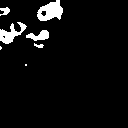

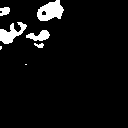

In [20]:
img = Image.open('./l/out.png')
display(img)
img = Image.open('./k/out.png')
display(img)
img = Image.open('./j/out.png')
display(img)

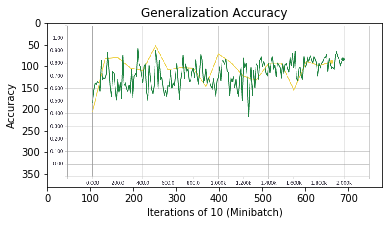

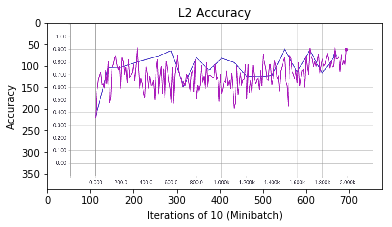

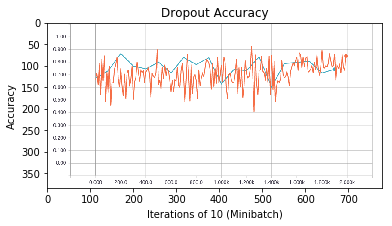

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(1)
img = Image.open('./l/accuracy.png')

plt.imshow(img)
plt.title('Generalization Accuracy')
plt.xlabel('Iterations of 10 (Minibatch)')
plt.ylabel('Accuracy')

plt.figure(2)
img1 = Image.open('./k/accuracy.png')

plt.imshow(img1)
plt.title('L2 Accuracy')
plt.xlabel('Iterations of 10 (Minibatch)')
plt.ylabel('Accuracy')

plt.figure(3)
img2 = Image.open('./j/accuracy.png')

plt.imshow(img2)
plt.title('Dropout Accuracy')
plt.xlabel('Iterations of 10 (Minibatch)')
plt.ylabel('Accuracy')